# Praktikum ML 2 - 1
## Fahrel Gibran Alghany - 24060120130106
### Iris Dataset

In [28]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan link dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Mendefinisikan list berisi kolom-kolom dataset
names = ['sepal-l','sepal-w','petal-l','petal-w','class']

data = pd.read_csv(path, names=names)

In [29]:
# Menampilkan 10 data teratas
data.head(10)

,sepal-l,sepal-w,petal-l,petal-w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
# Menampilkan dimensi dataset
data.shape

(150, 5)

In [31]:
# Import library yang dibutuhkan
from sklearn import model_selection

# Menyimpan nilai-nilai dalam dataset ke dalam variabel array
array = data.values

# Menyimpan data fitur-fitur pada dataset ke dalam variabel X
X = array[:,0:4]

# Menyimpan data label pada dataset ke dalam variabel Y
Y = array[:,4]

# Mendefinisikan ukuran testing data dan seed untuk random state
test_size = 0.20
seed = 7

# Memisahkan data menjadi training (dan validation) set dan testing set
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

In [32]:
# Import library berisi algoritma klasifikasi yang akan digunakan
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# Mendefinisikan array kosong
models = []

# Membuat array asosiatif berisi nama algoritma dan algoritma klasifikasinya
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Logistic Regression', LogisticRegression(max_iter=1000)))
models.append(('K-Nearest Neighbor', KNeighborsClassifier()))

In [33]:
# Mendefinisikan seed dan scoring yang digunakan untuk menguji model dengan
# validation data
seed = 7
scoring = 'accuracy'

In [34]:
results = []
names = []

# Membagi data menjadi training dan validation set menggunakan k-fold cross 
# validation, dengan k = 10
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  
  # Menguji akurasi dari masing-masing model menggunakan validation data
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Decision Tree : 0.958333 (0.076830)
Random Forest : 0.966667 (0.040825)
SVM : 0.983333 (0.033333)
Naive Bayes : 0.966667 (0.040825)
Logistic Regression : 0.983333 (0.033333)
K-Nearest Neighbor : 0.983333 (0.033333)


*Output* di atas menunjukkan bahwa algoritma SVM, Logistic Regression, dan KNN menghasilkan akurasi terbaik dari pengujian akurasi model klasifikasi (menggunakan validation set) yang dihasilkan dari proses pelatihan data (menggunakan training set).

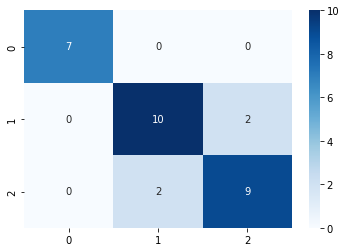

akurasi pada testing data :
  0.8666666666666667
classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [35]:
# Import library untuk mengevaluasi algoritma
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mendefinisikan algoritma SVM 
svm = SVC()

# Melatih data training dengan algoritma SVM
svm.fit(X_train, Y_train)

# Menguji model klasifikasi yang dihasilkan dari proses pelatihan data dengan
# testing data.
predictions = svm.predict(X_test)

cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

print('akurasi pada testing data :\n ', accuracy_score(Y_test, predictions))
print('classification report : \n', classification_report(Y_test, predictions
))

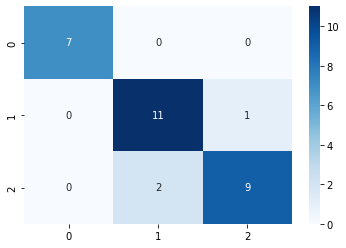

akurasi pada testing data :
  0.9
classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [36]:
# Import library untuk mengevaluasi algoritma
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mendefinisikan algoritma knn 
knn = KNeighborsClassifier()

# Melatih data training dengan algoritma knn
knn.fit(X_train, Y_train)

# Menguji model klasifikasi yang dihasilkan dari proses pelatihan data dengan
# testing data.
predictions = knn.predict(X_test)

cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print('akurasi pada testing data :\n ', accuracy_score(Y_test, predictions))
print('classification report : \n', classification_report(Y_test, predictions))


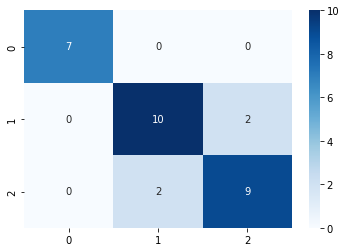

akurasi pada testing data :
  0.8666666666666667
classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



In [37]:
# Import library untuk mengevaluasi algoritma
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mendefinisikan algoritma logistic_regression 
logistic_regression = LogisticRegression(max_iter=1000)

# Melatih data training dengan algoritma logistic_regression
logistic_regression.fit(X_train, Y_train)

# Menguji model klasifikasi yang dihasilkan dari proses pelatihan data dengan
# testing data.
predictions = logistic_regression.predict(X_test)

cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print('akurasi pada testing data :\n ', accuracy_score(Y_test, predictions))
print('classification report : \n', classification_report(Y_test, predictions))

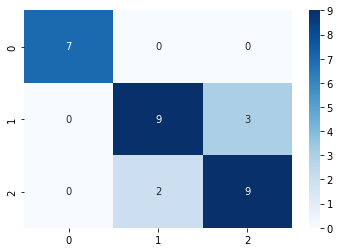

akurasi pada testing data :
  0.8333333333333334
classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

       accuracy                           0.83        30
      macro avg       0.86      0.86      0.86        30
   weighted avg       0.84      0.83      0.83        30



In [38]:
# Import library untuk mengevaluasi algoritma
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Mendefinisikan algoritma naive_bayes 
naive_bayes = GaussianNB()

# Melatih data training dengan algoritma naive_bayes
naive_bayes.fit(X_train, Y_train)

# Menguji model klasifikasi yang dihasilkan dari proses pelatihan data dengan
# testing data.
predictions = naive_bayes.predict(X_test)

cm = confusion_matrix(Y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()
print('akurasi pada testing data :\n ', accuracy_score(Y_test, predictions))
print('classification report : \n', classification_report(Y_test, predictions))

# Akurasi Terbaik adalah Model dengan Algoritma *K-NN*